In [1]:
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
%matplotlib ipympl

In [3]:
# rc('figure', autolayout=True, figsize=[16, 9], dpi=72, titlesize=26 )
# rc('font', family='monospace')
# rc('axes', titlesize=24, titleweight='heavy', labelsize=22, labelweight='bold')
# rc(('xtick', 'ytick'), labelsize = 24)
# rc('legend', fontsize=20)
rc('figure', autolayout=True, dpi=125, titlesize=20 )
rc('font', family='monospace')
rc('axes', titlesize=20, titleweight='heavy', labelsize=16, labelweight='bold')
rc(('xtick', 'ytick'), labelsize = 18)
rc('legend', fontsize=14)

In [4]:
data_dir = '/home/sarthak/my_projects/argset/data/iv_curve/'

In [5]:
file_data = f'{data_dir}/CEZAMAT_ArGSet_SiPM2.xlsx'

In [6]:
file_data_2 = f'{data_dir}/SiPM2_IV_Plot.csv'

In [7]:
file_data_3 = f'{data_dir}/ArGSet_SiPM1_VI_Curve.csv'

In [8]:
data = pd.read_excel(file_data)

In [9]:
data_2 = pd.read_csv(file_data_2)

In [10]:
data.head()

,Voltage (v),Current (uA),Unnamed: 2
0,5.0,-1.0,NaN
1,10.0,-1.0,NaN
2,15.0,-1.0,NaN
3,20.0,-1.0,NaN
4,25.0,-1.0,NaN


In [11]:
data_2.head()

,volt,current
0,29.00,-1.0
1,29.20,NaN
2,29.40,-1.0
3,29.45,-1.0
4,29.50,-1.0


In [12]:
data_3 = pd.read_csv(file_data_3)

In [13]:
data_3.head()

,Volt,Current
0,NaN,NaN
1,5.0,-2.0
2,10.0,-2.0
3,15.0,-1.0
4,20.0,-1.0


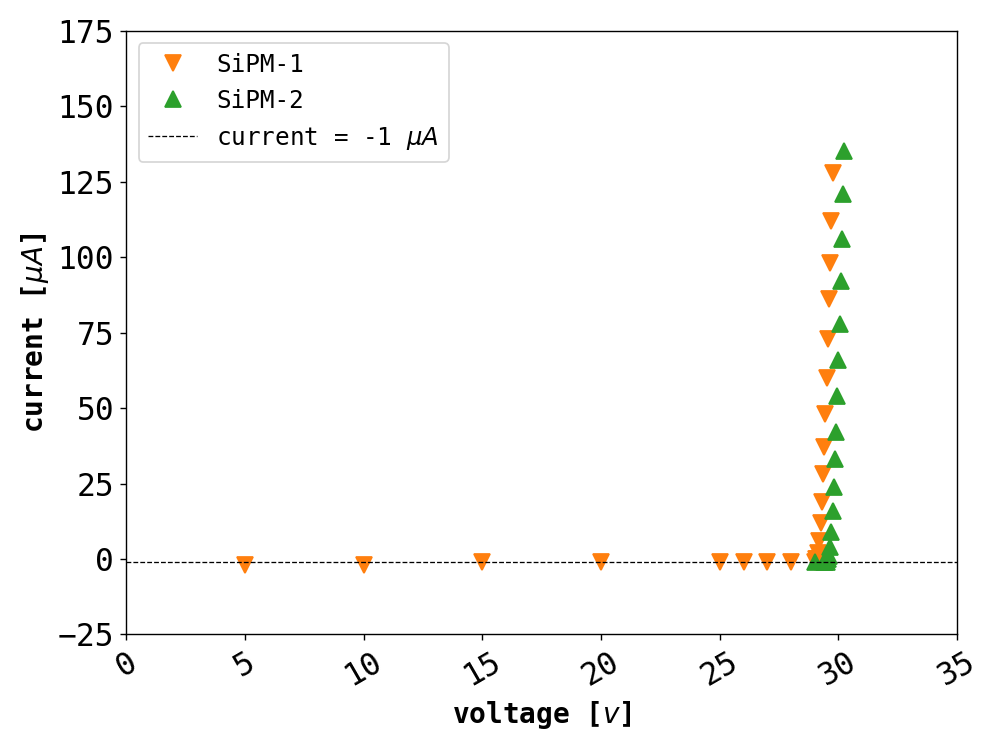

In [70]:
plt.close(1)

plt.figure(1, figsize=(8,6))
plt.plot(data_3['Volt'][1:], data_3['Current'][1:], 'v', color='C1',  markersize=9,  label='SiPM-1')
# plt.plot(data['Voltage (v)'], data['Current (uA)'], label='SiPM-2 run_01')
plt.plot(data_2['volt'], data_2['current'], '^', color='C2', markersize=9, label='SiPM-2') # run_02')
# plt.title('I-V plots for ArGSet with light inlet port exposed to ambient light')
plt.grid(False)
plt.axhline(y=-1.0, color='Black', linestyle='--', linewidth=0.75, label='current = -1 $\\mu A$')
plt.xlabel('voltage [$v$]')
plt.ylabel('current [$\\mu A$]')
plt.ylim(-25.0, 175.0)
plt.xlim(0.0, 35.0)
# plt.xlim(29.0, 30.5)
plt.xticks(rotation=30)
plt.legend(loc= 'upper left')
plt.yscale('linear')
# plt.savefig('../plots/IV_curve_SiPM.pdf')
plt.savefig('../plots/ArGSet_SiPM_VI_curve_Thesis.pdf')
# plt.savefig('../plots/ArGSet_SiPM_VI_curve_zoomed_Thesis.pdf')

In [15]:
def st_line(x, m, c):
    return m*x + c

In [16]:
popt_SiPM2, pcov_SiPM2 = curve_fit(st_line, data_2['volt'][7:20], data_2['current'][7:20], p0=[200, -5000])

In [17]:
# plt.figure(1)
# plt.plot(data_2['volt'][7:20], 
#          st_line(data_2['volt'][7:20], popt_SiPM2[0], popt_SiPM2[1]), label='best fit to SiPM-2')
# plt.legend()

In [18]:
popt_SiPM2[0]

222.41758241763108

In [19]:
popt_SiPM2[1]

-6601.406593410079

In [20]:
data_2['current'][20]

nan

In [21]:
## breakdown voltage for SiPM-2

In [22]:
(-1 - popt_SiPM2[1])/popt_SiPM2[0]

29.675741106728545

In [23]:
## Breakdown voltage for SiPM 1

In [24]:
popt_SiPM1, pcov_SiPM1 = curve_fit(st_line, data_3['Volt'][12:25], data_3['Current'][12:25], p0=[200, -5000])

In [25]:
data_3[1:25]

,Volt,Current
1,5.00,-2.0
2,10.00,-2.0
3,15.00,-1.0
4,20.00,-1.0
5,25.00,-1.0
6,26.00,-1.0
7,27.00,-1.0
8,28.00,-1.0
9,29.00,-1.0
10,29.05,0.0


In [26]:
popt_SiPM1

array([  213.62637211, -6236.75819705])

In [27]:
# plt.figure(1)
# plt.plot(data_3['Volt'][12:25], 
#          st_line(data_3['Volt'][12:25], popt_SiPM1[0], popt_SiPM1[1]), label='best fit to SiPM-1')
# plt.legend()

In [28]:
(-1 - popt_SiPM1[1])/popt_SiPM1[0]

29.19002057428421

 SiPM | breakdown voltage |
 ___
 2    | 29.67             | 
 ___
 1    | 29.19             |